# 1. Methodology

Probability is the branch of mathematics concerning numerical descriptions of how likely an event is to occur, or how likely it is that a proposition is true. The probability of an event is a number between 0 and 1. All  phenomena in nature are random events, so if we can know possibility of this event, we can predict the likelihood of it happening in the future or we can make decisions depending on it.

## 1.1. Random events, variables and probabilities 

#### Experiment and event

- Experiment or trial is any procedure that can be infinitely repeated and has a well-defined set of possible outcomes, known as the sample space. An experiment is said to be random if it has more than one possible outcome.

- The result of experiment is called event. There are three types of event in real life: random, certain and impossible events.

- The probability of an event shows how likely that event is to occur. Formula of probability of event $A$:

$$P(A) = \frac{\mbox{number of favorable outcomes}}{\mbox{total number outcomes}}$$


In [1]:
import numpy as np
import pandas as pd
from scipy import special

*Problem:* A box has 10 products, there are 6 standard products and 4 substandard products. Take random 3 products in box. Find the probability in case:
- All three are standard product
- There are 2 standard product


In [2]:
m1 = special.comb(6,3)
n = special.comb(10,3)
print('P(A)={:.3f}'.format(m1/n))

P(A)=0.167


In [3]:
m2 = special.comb(6,2) * special.comb(4,1)
n = special.comb(10,3)
print('P(B)={:.3f}'.format(m2/n))

P(B)=0.500


#### Addition rule of probabilities

There are 2 formula for addition rule, one for two mutually exclusive events and other for non-mutually exclusive events. Events are mutually exclusive since they cannot occur in the same experiment
- If $A$ and $B$ are mutually exclusive events, the sum of probability of 2 events is

$$P(A + B) = P(A) + P(B)$$

- If $A$ and $B$ are non-mutually exclusive events:

$$P(A + B) = P(A) + P(B) - P(A.B)$$

*Problem:* A day of the week is chosen at random. What is the probability of choosing a Monday or Tuesday?

In [4]:
p = 1/7 + 1/7
p

0.2857142857142857

*Problem:* In a pet store, there are 6 puppies, 9 kittens, 4 gerbils and 7 parakeets. If a pet is chosen at random, what is the probability of choosing a puppy or a parakeet?

In [5]:
total = 6+9+4+7
p = 6/total + 7/total
p

0.5

*Problem:* The box has 10 bottles, there are 2 broken bottles. Find the probability of getting random 6 bottles that includes no larger than 1 broken bottles.

In [6]:
# a0 - event: in 6 bottles there is no broken bot
# a1 - event: in 6 bottles there is 1 broken bot
# a - event: in 6 bottles there is no larger than 1 broken bot

a0 = special.comb(8,6) / special.comb(10,6)
a1 = special.comb(2,1) * special.comb(8,5) / special.comb(10,6)

a = a0 + a1
print('P(A)={:.3f}'.format(a))

P(A)=0.667


#### Multiplication rule of probabilities

Events are independent if knowing one event occurred doesn't change the probability of the other event. 
- If $A$ and $B$ are independent:

$$P(A\cap B) = P(A)\cdot P(B)$$

- If $A$ and $B$ are dependent:

$$P(A\cap B) = P(A)\cdot P(B|A) = P(B)\cdot P(A|B)$$

*Problem:* 2 planes attack 1 target, each plane attack 1 time with probability of hitting on the target are 0.7 and 0.8. Find the probability of target was hit.

In [7]:
#a1 - plane 1 hit target
#a2 - plane 2 hit target

a = 0.7 + 0.8 - 0.7*0.8
a

0.9400000000000001

*Problem:* The box has 7 standard products and 3 substandard products. Take out random 2 products in turn. Find the probability of 2 products are standard.

In [8]:
#a1 - the first product is standard
#a2 - the second product is standard
#a - All two product are standard

a = 7/10 * 6/9
a

0.46666666666666656

*Problem:* An analyst has estimated the probability that an investment manager will exceed his benchmark return in each of the next two quarters is 0.35. Assuming that each quarter’s performance is independent of the other, which is the probability that the investment manager will exceed his benchmark return over the two-quarter period in total?

In [9]:
p = 0.35*0.35
p

0.12249999999999998

## 1.2. Probability formula

In [10]:
import numpy as np
import pandas as pd
from scipy import special

#### Bernoulli formula

Assume repeating $n$ independent trials, each trial has only two possible outcomes, “success” and “failure”. The probability of success remains the same for each trial and equal $q=1-p$. The probability of event $A$ success $x$ times in $n$ trials is:

$$P_n(x) = C^x_n \cdot p^x \cdot (1-p)^{n-x}$$

for $x=1,2,\dots,n$

Applications: Instead of using addition and multiplication rule, using bernoulli formula to find probability that event A successes $x$ times in $n$ trials

*Problem:* In factory there are 5 machines, each machine has a probability of broken is 0.1. Find the prob to have exactly 2 machine broke 

In [11]:
p = special.comb(5,2)* (0.1)**2 *(0.9)**3
print(p)

0.07290000000000002


#### Bayes formula

Bayes formula is used to find the conditional probability of event A when we know prior knowledge of relevant event. Assume $P(A)>0$ and ${B_1, B_2,\dots,B_n}$ is a set of complete events. With $k=1,2,\dots,n$, we have:

$$P(B_k|A) = \frac{P(A|B_k)\cdot P(B_k)}{P(B_1)P(A|B_1)+P(B_2)\cdot P(A|B_2)+\dots+P(B_n)\cdot P(A|B_n)}$$

- $P(B_k|A)$ is a conditional probability: the probability of event $B_k$ occurring given that $A$ is true. It is also called the posterior probability of $B_k$ given $A$.
- $P(A|B_k)$ is also a conditional probability: the probability of event $A$ occurring given that $B_k$ is true.
- $P(A)$ and $P(B_k)$ are the probabilities of observing $A$ and $B_k$ respectively without any given conditions; they are known as the marginal probability or prior probability.

*Problem:* A small company has rated 75% of its employees as satisfactory and 25% as unsatisfactory. A survey  shows that 80% of the satisfactory workers had previous work experience in the job they are now doing, while 15% of the unsatisfactory workers had no work experience in the job they are now doing. If a person who has had previous work experience is hired, what is the approximate probability that this person will be an unsatisfactory employee?

In [12]:
# A: người đó có kinh nghiệm
# B1: người đó ko hài lòng
# B2: người đó hài lòng
# find P(B1/A)
p_b1 = 0.25
p_b2 = 0.75
p_a_b1 = 1-0.15
p_a_b2 = 0.8
p_b1_a = (p_b1*p_a_b1) / (p_b1*p_a_b1 + p_b2*p_a_b2)
p_b1_a

0.2615384615384615

*Problem:*  A basketball team is to play two games in a tournament. The probability of winning the first game is .10. If the first game is won, the probability of winning the second game is .15. If the first game is lost, the probability of winning the second game is .25. What is the probability the first game was won if the second game is lost?

In [13]:
p = (0.1*0.85) / ((0.1*0.85)+(0.9*0.75))
p

0.1118421052631579

*Problem:* An analyst expects that 20% of all publicly traded companies will be decline in earnings next year. The analyst has developed a ratio to help forecast this decline. If the company is headed for a decline, there is a 90% chance that this ratio will be negative. If the company is not headed for a decline, there is only a 10% chance that the ratio will be negative. The analyst randomly selects a company with a negative ratio. The probability that the company will experience a decline is:

In [14]:
p = (0.9*0.2) / ((0.9*0.2)+(0.1*0.8))
p

0.6923076923076924

## 1.3. Parameter of random variables 

In [15]:
import numpy as np
import pandas as pd
from scipy import stats

#### Expected value

Expected values, also know as mean, average, is a generalization of the weighted average. Let $x$ be a random event with a finite number of outcomes $x_1, x_2,\dots,x_k$ occurring with probabilities $p_1,p_2,\dots,p_k$ respectively. Formula of expected value:

$$E(X) = \sum_{i=1}^k x_i\cdot p_i$$

Applications: expected value shows up in finance and economic as a standard to make a decision in case there are multiple choices or stategies. This indicator is performed as expected profit or expected sales.

*Problem*: Assume a store imports amount of snacks. Demand of this product over years in the table:

Demand| Prob
:--|:--
20|0.3
21|0.25
22|0.18
23|0.14
24|0.1
25|0.03

This store buy with 7 USD/pack and sell with 10 USD/pack, in the end of the year, store had sale off with 4 USD/pack before it out of date. The store want to find out the amount of snack to make the highest expected profit. 

*Answer:* Assume $i$ is number of import snacks, $j$ is number of demand.
Expected profit will follow the equation:

$$E_{ij}=\begin{cases}
10i-7j+4(i-j) & \mbox{for}\;j<i \\
10i-j & \mbox{for}\;j\geq i
\end{cases}
$$

In [16]:
df = pd.DataFrame({'demand_j':[20,21,22,23,24,25],
                      'prob':[0.3,0.25,0.18,0.14,0.1,0.03]})

supply = pd.DataFrame({'supply_i':[20,21,22,23,24,25]})

In [17]:
df = df.join(supply, how='cross')
df.head()

,demand_j,prob,supply_i
0,20,0.3,20
1,20,0.3,21
2,20,0.3,22
3,20,0.3,23
4,20,0.3,24


In [18]:
def get_profit(df):
    if df.demand_j < df.supply_i:
        return (6*df.demand_j - 3*df.supply_i)
    else:
        return 3*df.supply_i

In [19]:
df['profit'] = df.apply(get_profit, axis=1)

df['exp_profit'] = df.prob*df.profit

In [20]:
df.groupby('supply_i').sum()[['exp_profit']]

,exp_profit
supply_i,
20,60.00
21,61.20
22,60.90
23,59.52
24,57.30
25,54.48


*Problem:* A company manufactures electronic lights. 1 out of every 50 lights is faulty. However, the company does not know which ones are faulty until they receive a complaint from the buyer. The company makes a profit of 30 USD on the sale of a working light but suffers a loss of 800 USD for every faulty gadget. Can the company make a profit in the long term?

In [21]:
expect_profit = 30*49/50 -800*1/50
print("profit of each light is ",expect_profit)

profit of each light is  13.399999999999999


#### Median
Median is the value separating distribution of random variable into 2 equal parts, signing $m_d$

In [22]:
np.random.seed(1)
sample = np.random.randint(100, 1000, size=100)
sample

array([137, 335, 172, 867, 815, 745, 947, 244, 229, 683, 849, 608, 490,
       381, 278, 376, 354, 457, 568, 352, 590, 768, 498, 662, 680, 315,
       853, 603, 578, 964, 186, 241, 493, 107, 419, 929, 634, 413, 613,
       996, 416, 309, 364, 828, 753, 727, 531, 733, 556, 642, 171, 487,
       554, 661, 413, 615, 892, 597, 143, 688, 126, 920, 436, 721, 983,
       397, 566, 115, 164, 296, 125, 467, 838, 571, 382, 765, 716, 122,
       877, 807, 226, 379, 481, 456, 255, 413, 695, 266, 748, 388, 518,
       878, 379, 755, 851, 187, 893, 343, 448, 686])

In [23]:
np.median(sample)

524.5

#### Mode

Mode is the value of random variable:
- Highest probability with discrete variable
- Maximum of distribution function with countinuos variable

In [24]:
import statistics

In [25]:
statistics.mode(sample)

413

#### Variance

Variance is the expectation of the squared deviation of a random variable from its mean.  It measures how far a set of numbers is spread out from their average value.

$$V(X) = E[X-E(X)]^2$$

Applications: In engineering, variance indicate for error of devices, details, ... In bussiness, it indicate for risk of decisions.

*Problem:* An investor is considering investing into 2 project A and B. A and B are independent. The recovery rate after 2 years of 2 projects is random variable with probability as below:

Project A:

Rate|Prob
:--|:--
65|0.04
67|0.12
68|0.16
69|0.28
70|0.24
71|0.08
73|0.08

Project B:

Rate|Prob
:--|:--
66|0.12
68|0.28
69|0.32
70|0.2
71|0.08

Choosing the project to invest in case:
- The highest recovery rate
- The lowest risk of recovery rate

In [26]:
pja = pd.DataFrame({'rate':[65,67,68,69,70,71,73],
                    'prob':[0.04,0.12,0.16,0.28,0.24,0.08,0.08]})
pjb = pd.DataFrame({'rate':[66,68,69,70,71],
                   'prob':[0.12,0.28,0.32,0.2,0.08]})

In [27]:
expect_a = np.sum(pja.rate*pja.prob)
expect_b = np.sum(pjb.rate*pjb.prob)

if expect_a < expect_b:
    print('The highest recovery rate is project B with expected rate {:.2f}'.format(expect_b))
else:
    print('The highest recovery rate is project A with expected rate {:.2f}'.format(expect_a))

The highest recovery rate is project A with expected rate 69.16


In [28]:
var_a = np.sum(pja.rate-expect_a)**2
var_b = np.sum(pjb.rate-expect_b)**2
if var_a < var_b:
    print('The lowest risk of recovery rate is project A with expected rate {:.2f}'.format(var_a))
else:
    print('The lowest risk of recovery rate is project B with expected rate {:.2f}'.format(var_b))

The lowest risk of recovery rate is project B with expected rate 0.16


#### Coefficient of variation

The coefficient of variation (CV) is a statistical measure of the dispersion of data points in a data series around the mean. The coefficient of variation represents the ratio of the standard deviation to the mean, and it is a useful statistic for comparing the degree of variation from one data series to another, even if the means are drastically different from one another.

$$\mbox{CV}=\left|\frac{\sigma_x}{E(X)}\right|\cdot100\%$$

In [29]:
np.random.seed(1)
sample = np.random.randint(100, 1000, size=100)
sample

array([137, 335, 172, 867, 815, 745, 947, 244, 229, 683, 849, 608, 490,
       381, 278, 376, 354, 457, 568, 352, 590, 768, 498, 662, 680, 315,
       853, 603, 578, 964, 186, 241, 493, 107, 419, 929, 634, 413, 613,
       996, 416, 309, 364, 828, 753, 727, 531, 733, 556, 642, 171, 487,
       554, 661, 413, 615, 892, 597, 143, 688, 126, 920, 436, 721, 983,
       397, 566, 115, 164, 296, 125, 467, 838, 571, 382, 765, 716, 122,
       877, 807, 226, 379, 481, 456, 255, 413, 695, 266, 748, 388, 518,
       878, 379, 755, 851, 187, 893, 343, 448, 686])

In [30]:
stats.variation(sample)

0.4588028134926527

*Problem:* Stock A has an expected return of 15% with a standard deviation of 10%, while Stock B has an expected return of 10% coupled with a 5% standard deviation. Which stock should be choose to minimize the risk?

In [31]:
cv_a = 0.1/0.15 
cv_b = 0.05/0.1 

if cv_a < cv_b:
    print('Choosing stock A with CV ={:.2f}'.format(cv_a))
else:
    print('Choosing stock B with CV ={:.2f}'.format(cv_b))

Choosing stock B with CV =0.50


# 2. Distributions
The distribution is a mathematical function calculates the probability of different possible outcomes for an experiment. The `scipy.stats` library supports the following popular distributions:
- Binomial distribution: `binom(n, p)`
- Poisson distribution: `poisson(mu)`
- Uniform distribution: `uniform(loc, scale)`
- Normal distribution: `norm(loc, scale)`
- t-distribution: `t(df)`
- F-distribution: `f(dfn, dfd)`
- Chi-squared distribution: `chi2(df)`
- Cauchy distribution: `cauchy(loc, scale)`
- Exponential distribution: `expon(scale)`
- Logistic distribution: `logistic(loc, scale)`
- Beta distribution: `beta(a, b)`
- Gamma distribution: `gamma(a)`

Each distribution object has the following methods:
- `rvs(size)`: returns a random variable follow the given distribution
- `pmf(k)` (for discrete distributions) or `pdf(x)` (for continous distributions): returns the probability of a given value $P(x_i=c)$
- `cdf(x)`: returns the cumulative probability of a given value $P(x_i\leq c)$
- `sf(x)`: returns $P(x_i>c) = 1-P(x_i\leq c)$
- `mean()`, `median()`, `var()` and `std()`: return the corresponding statistics
- `stats(moments='mvsk')`: returns the mean, standard deviation, skewness and kurtosis

*Reference: [SciPy - Statistical functions](https://docs.scipy.org/doc/scipy/reference/stats.html)*

## 2.1. Univariate distribution

In [32]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

#### Binomial distribution
Binomial distribution is a discrete distribution, it is defined as the probability of $k$ $(k\in\mathbb{N})$ number of occurences of an event in $n$ $(n\in\mathbb{N})$ trials. Each trial has exactly two possible outcomes: success with the probability of $p$ $(p\in [0;1])$ and failure with the probability of $1-p$. The PMF of binomial distribution is:

$$f(k;n) = \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k}$$

If $\mathbf{x}$ is a binomial distirbuted random variable: $\mathbf{x}\sim \mbox{Bin}(n,p)$, then $\mathbf{x}$ has the mean of $np$ and the variance of $np(1-p)$. If there is only a single trial ($n=1$), the distribution is known as Bernoulli distribution.

*Reference: [Wikipedia - Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)*

For example, given a balanced coin (so that each flip has a probability of $p=0.5$ head and $1-p=0.5$ tail). Flip the coin $n=6$ times. Binomial distribution can be used to find:
- The probability of 4 heads
- The probability of 3 heads or less
- The probability of more than 3 heads
- The expected number of heads

In [33]:
stats.binom(n=6, p=0.5).pmf(4)

0.234375

In [34]:
stats.binom(n=6, p=0.5).cdf(3)

0.65625

In [35]:
stats.binom(n=6, p=0.5).sf(3)

0.34375

In [36]:
stats.binom(n=6, p=0.5).mean()

3.0

#### Poisson distribution
Poisson distribution is the other discrete distribution in this topic. It is defined as the probability of $k$ $(k\in\mathbb{N})$ number of events ocurring in an unit of time, assume that the events are independent and the average number of events per unit of time should must be a known constant $\lambda$. The PMF of Poisson distribution is:

$$f(k;\lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$$

If $\mathbf{x}$ is a Poisson distributed random variable: $\mathbf{x}\sim \mbox{Poi}(\lambda)$, then both the mean and the variance of $\mathbf{x}$ equal $\lambda$.

*Reference: [Wikipedia - Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)*

For example, a police department receives an average of $\lambda=5$ calls per hour. Poisson distribution can be used to calculate the probability of receiving $k=2$ calls in a randomly selected hour.

In [37]:
stats.poisson(mu=5).pmf(2)

0.08422433748856832

#### Exponential distribution
Exponential distribution is a continous distribution, and is strongly related to Poisson distribution. It describes the probability of time between two events, given the average number of events per unit of time is $\lambda$ (the average amount of time to the next event can be calculated as $1/\lambda$). The PDF of exponential distribution is:

$$f(x;\lambda) = \lambda e^{-\lambda x}$$

If $\mathbf{x}$ is a exponential distributed random variable: $\mathbf{x}\sim \mbox{Exp}(\lambda)$, then $\mathbf{x}$ has the mean of $\displaystyle{\frac{1}{\lambda}}$ and the variance of $\displaystyle{\frac{1}{\lambda^2}}$.

*Reference: [Wikipedia - Exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution)*

For example, a police department receives an avergae of $\lambda=5$ calls per hour. Exponential distribution can be used to calculate the probability that the next call comes after 15 minutes ($x=0.25$).

In [38]:
# scale = 1/lambda
stats.expon(scale=1/5).pdf(0.25)

1.4325239843009503

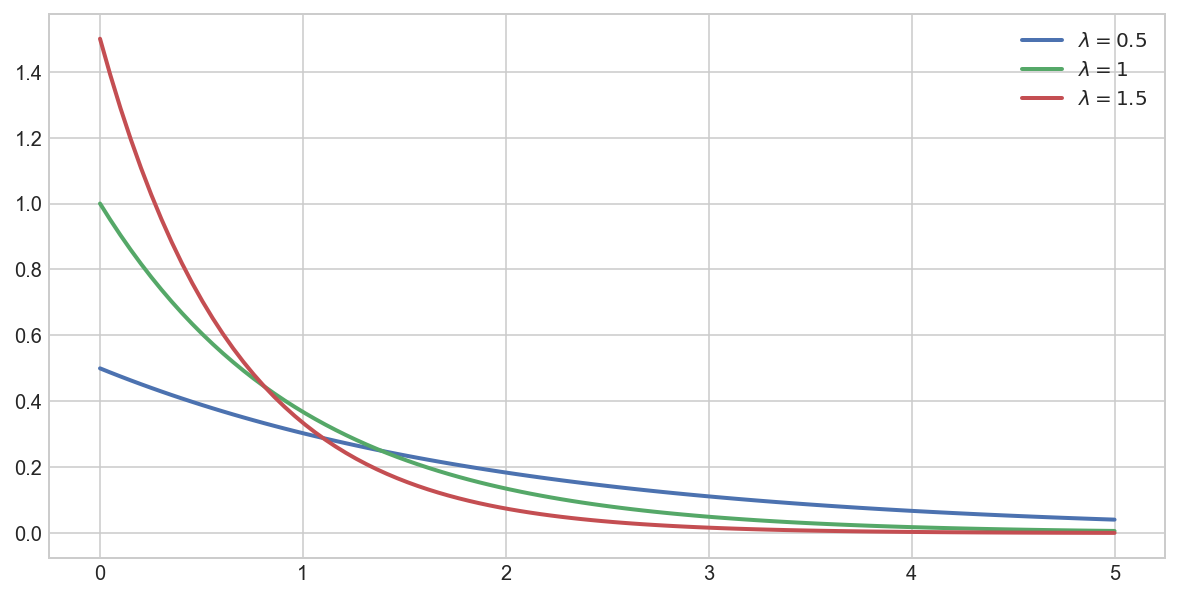

In [39]:
data = [0.5, 1, 1.5]
fig, ax = plt.subplots(figsize=(10,5))
for lamda in data:
    x = np.linspace(0, 5, 100)
    y = stats.expon(scale=1/lamda).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$\lambda={lamda}$' for lamda in data])
plt.show()

#### Normal distribution
Normal distribution is the most important distribution in Statistics since many continous data in real life follow a normal distribution such as weight, IQ score, blood pressure and shoe size. It is also the foundation of many other distributions as well as the Centre Limit Theorem. The PDF of normal distribution is:

$$f(x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}\cdot\exp{\left(-\frac{1}{2}{\frac{(x-\mu)^2}{\sigma^2}}\right)}$$

If $\mathbf{x}$ is a normal distributed random variable: $\mathbf{x}\sim \mbox{N}(\mu,\sigma)$, then $\mathbf{x}$ has the mean of $\mu$ and the variance of $\sigma^2$. In case $\mathbf{x}\sim \mbox{N}(0,1)$, the variable is now  standard normal distributed.

*Reference: [Wikipedia - Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)*

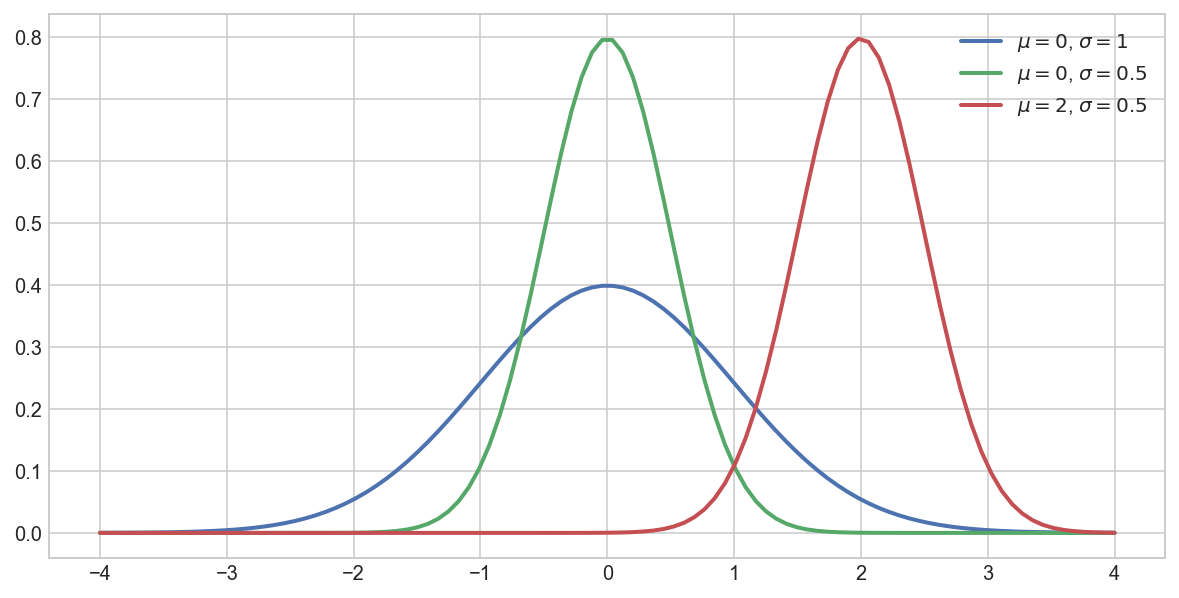

In [40]:
data = [(0, 1), (0, 0.5), (2, 0.5)]
fig, ax = plt.subplots(figsize=(10,5))
for mu, sigma in data:
    x = np.linspace(-4, 4, 100)
    y = stats.norm(mu, sigma).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$\mu={mu}$, $\sigma={sigma}$' for mu, sigma in data])
plt.show()

#### Logistic distribution
Logistic distribution can be used in growth models and logistic regression; its shape is very similar to normal distribution. Logistic distribution has two parameters: $\mu$ (location) and $s$ (scales). Consecutively, the PDF of logistic distribution is:

$$f(x;\mu,s) = \frac{\exp{\left(-\frac{x-\mu}{s}\right)}}{s\left(1+\exp{\left(-\frac{x-\mu}{s}\right)}\right)^{2}}$$

If $\mathbf{x}$ is a logistic distributed random variable: $\mathbf{x}\sim \mbox{Logistic}(\mu,s)$, then $\mathbf{x}$ has the mean of $\mu$ and the variance of $\displaystyle{\frac{s^2 \pi^2}{3}}$.

*Reference: [Wikipedia - Logistic distribution](https://en.wikipedia.org/wiki/Logistic_distribution)*

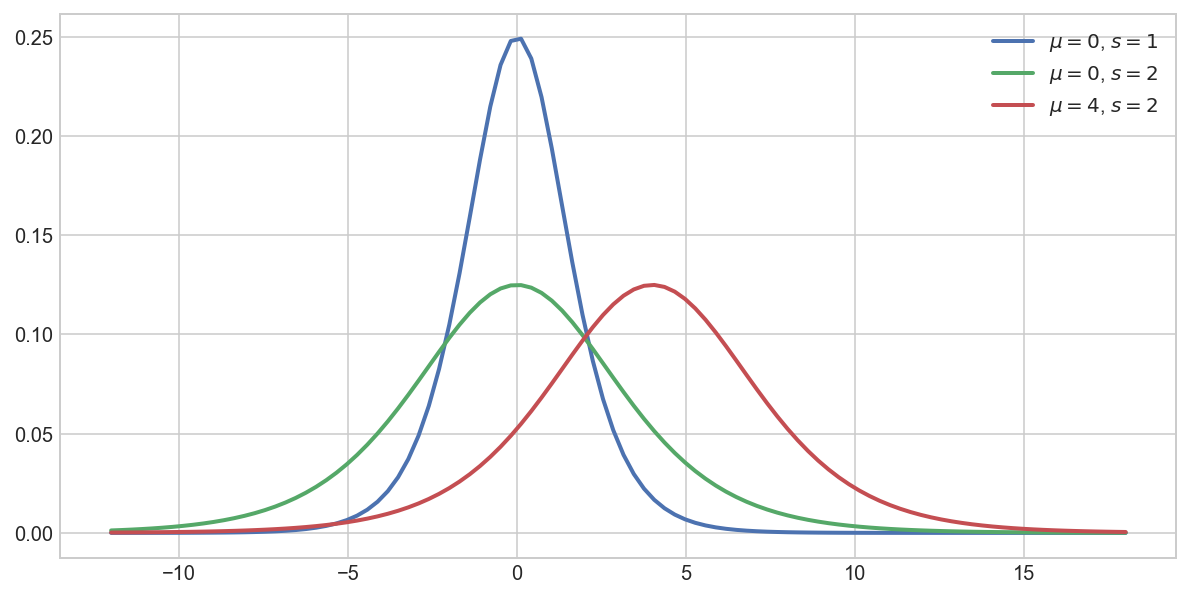

In [41]:
data = [(0, 1), (0, 2), (4, 2)]
fig, ax = plt.subplots(figsize=(10,5))
for mu, s in data:
    x = np.linspace(-12, 18, 100)
    y = stats.logistic(mu, s).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$\mu={mu}$, $s={s}$' for mu, s in data])
plt.show()

#### Chi-square distribution
Let $\mathbf{x}_1,\mathbf{x}_2,\dots,\mathbf{x}_k$ are independent standard normal distributed variables, then the variable $\displaystyle{\sum{\mathbf{x}_i^2}}$ has a chi-square distribution with $k$ degrees of freedom. Chi-square distribution is mainly used in hypothesis testing. The PDF of chi-square distribution is:

$$f(x;k) = \frac {1}{\Gamma \left(\frac{k}{2}\right)2^{\frac{k}{2}}}\cdot x^{\frac{k}{2}-1}\cdot e^{-\frac{x}{2}}$$

If $\mathbf{x}$ is a chi-square distributed random variable: $\mathbf{x}\sim \chi^2(\nu)$, then $\mathbf{x}$ has the mean of $k$ and the variance of $2k$.

*Reference: [Wikipedia - Chi-square distribution](https://en.wikipedia.org/wiki/Chi-square_distribution)*

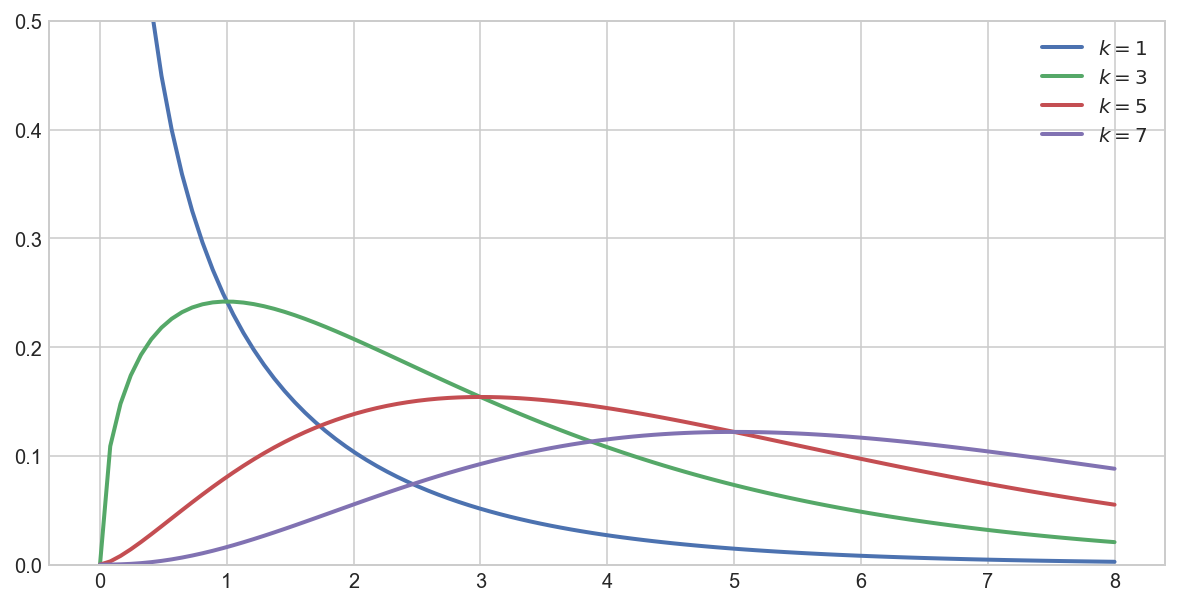

In [42]:
data = [1, 3, 5, 7]
fig, ax = plt.subplots(figsize=(10,5))
for k in data:
    x = np.linspace(0, 8, 100)
    y = stats.chi2(k).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$k={k}$' for k in data])
ax.set_ylim((0, 0.5))
plt.show()

#### t-distribution
Let $\mathbf{x}_1,\mathbf{x}_2,\dots,\mathbf{x}_n$ be independent samples drawn from the distribution $\mbox{N}(\mu,\sigma)$, then the random variable $\displaystyle{\frac{\hat \mu_{\mathbf{x}_i}-\mu}{\hat \sigma_{\mathbf{x}_i}/\sqrt{n}}}$ has a t-distribution with $\nu=n-1$ degree of freedom. When sample size is large $n>30$, the difference between t-distribution and normal distribution is negligible, therefore it can be used as a normal approximation when population variance is unknown. The PDF of t-dsitrbution is:

$$
f(x;\nu) = 
\frac {\Gamma\left(\frac{\nu+1}{2}\right)} {\Gamma\left(\frac{\nu}{2}\right)\sqrt{\nu\pi}}
{\left(1+\frac{x^2}{\nu}\right)}^{-\frac{\nu+1}{2}}
$$

Notice that $\Gamma(x)$ is the gamma function, which is the extension of factorial function to real numbers.

If $\mathbf{x}$ is a t-distributed random variable: $\mathbf{x}\sim \mbox{t}(\nu)$, then $\mathbf{x}$ has the mean of $0$ and the variance of $\displaystyle{\frac{\nu}{\nu-2}}$.

*Reference: [Wikipedia - Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution)*

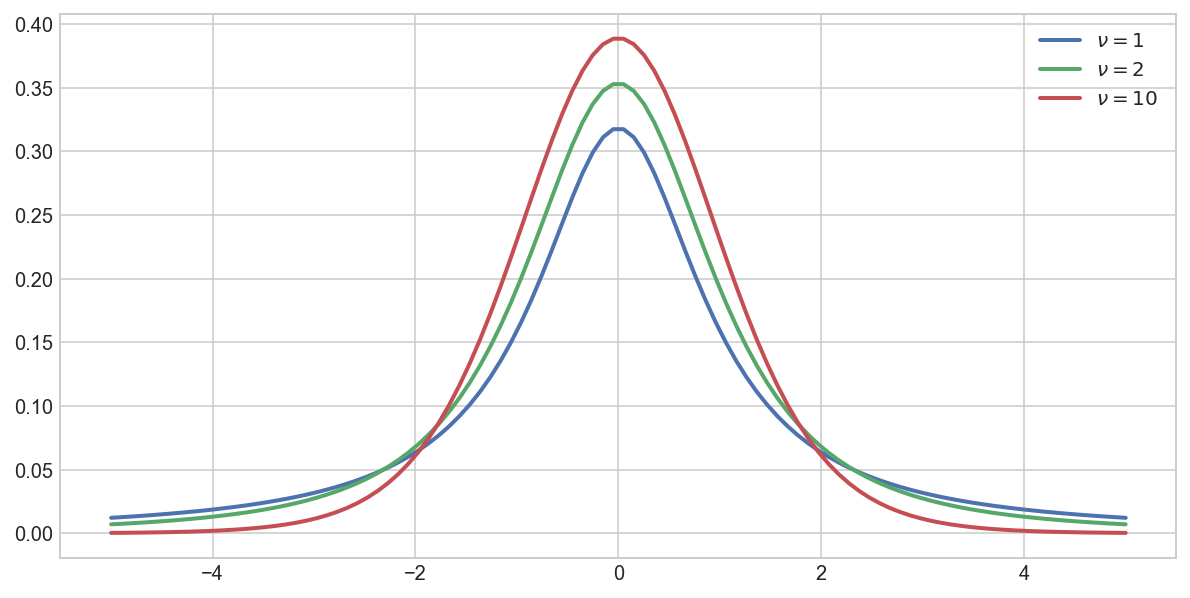

In [43]:
data = [1, 2, 10]
fig, ax = plt.subplots(figsize=(10,5))
for nu in data:
    x = np.linspace(-5, 5, 100)
    y = stats.t(nu).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$\nu={nu}$' for nu in data])
plt.show()

#### F-distribution
Given two variable $\mathbf{x}_1\sim \chi^2(d_1)$ and $\mathbf{x}_2\sim \chi^2(d_2)$, then the variable $\displaystyle{\frac{X_1/d_1}{X_2/d_2}}$ has a F-distribution with two shape parameters $d_1$, $d_2$ (degree of freedom). The PDF of F-distribution is:

$$f(x; d_1, d_2) = 
\frac{1}{x\,\mbox{B}\left(\frac{d_1}{2},\frac{d_2}{2}\right)}
\sqrt{\frac{(d_1x)^{d_1}\,d_2^{d_2}}{(d_1x+d_2)^{d_1+d_2}}}$$

If $\mathbf{x}$ is a F-distributed random variable: $\mathbf{x}\sim \mbox{F}(d_1,d_2)$, then $\mathbf{x}$ has the mean of $\displaystyle{\frac{d_2}{d_2-2}}$ and the variance of $\displaystyle{\frac{2d_2^2\,(d_1+d_2-2)}{d_1(d_2-2)^2(d_2-4)}}$.

*Reference: [Wikipedia - F-distribution](https://en.wikipedia.org/wiki/F-distribution)*

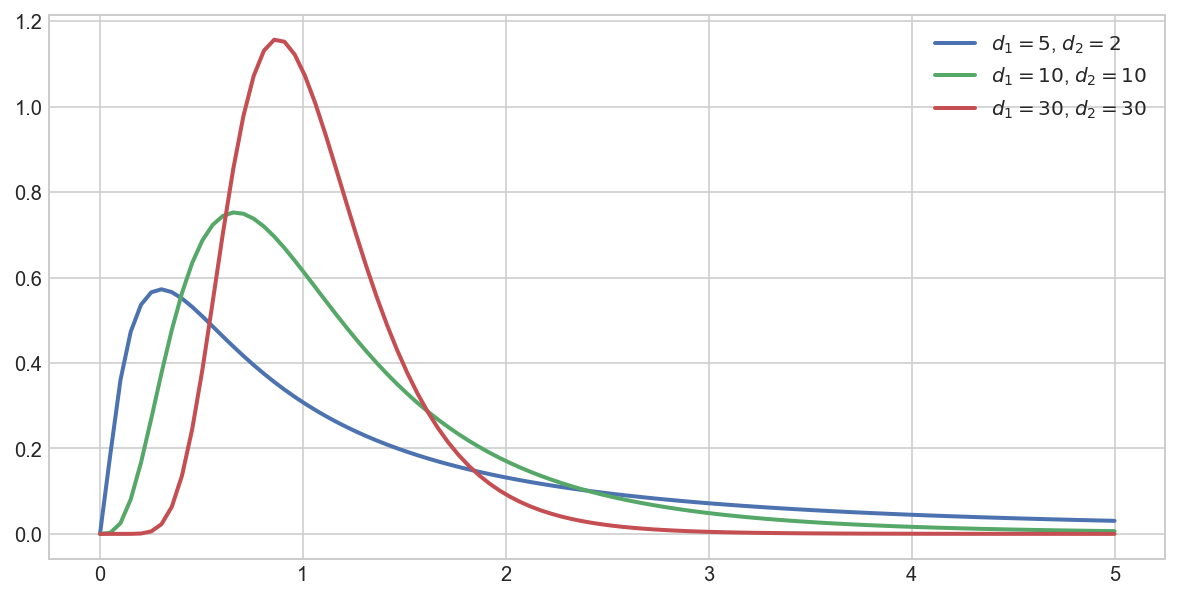

In [44]:
data = [(5,2), (10,10), (30,30)]
fig, ax = plt.subplots(figsize=(10,5))
for d1, d2 in data:
    x = np.linspace(0, 5, 100)
    y = stats.f(d1, d2).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$d_1={d1}$, $d_2={d2}$' for d1, d2 in data])
plt.show()

#### Beta distribution
Beta distribution is defined on the interval $[0;1]$ with two shape parameters, $\alpha$ and $\beta$. The PDF of beta distribution is:

$$f(x;\alpha,\beta) = \frac{x^{\alpha-1}\,(1-x)^{\beta-1}}{\mbox{B}(\alpha,\beta)}$$

Notice that $\mbox{B}(\alpha,\beta)$ is the beta function which is defined based on the gamma funcion. The demoninator in this function works as a normalization to ensure the area under the curve is 1.

If $\mathbf{x}$ is a beta distributed random variable: $\mathbf{x}\sim \mbox{Beta}(\alpha,\beta)$, then $\mathbf{x}$ has the mean of $\displaystyle{\frac{\alpha}{\alpha+\beta}}$ and the variance of $\displaystyle{\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}}$.

*Reference: [Wikipedia - Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution)*

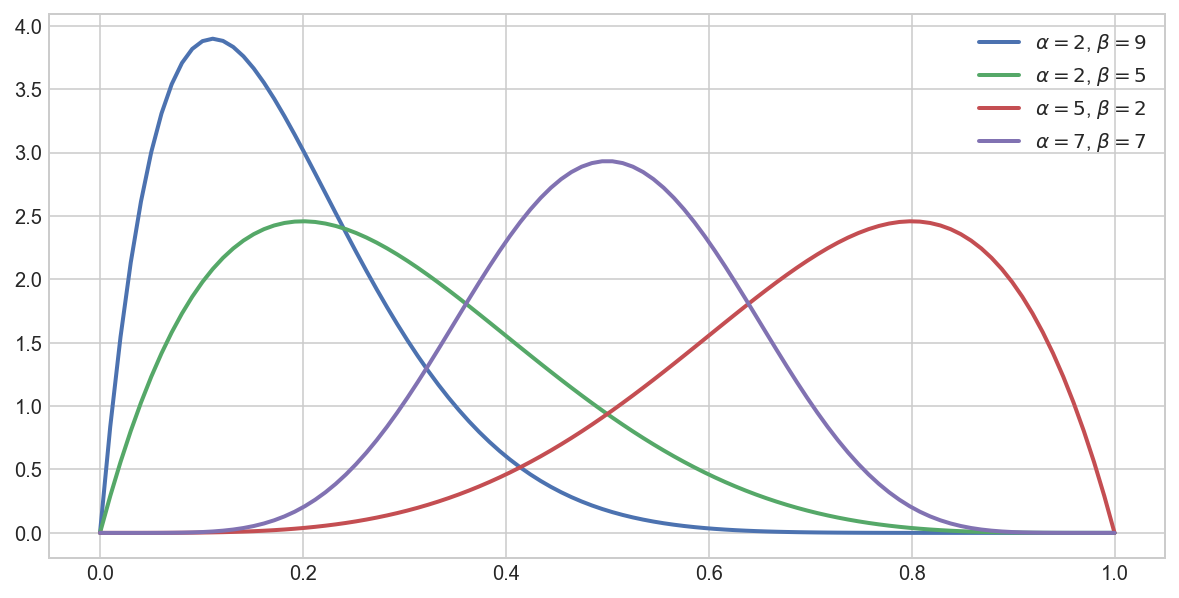

In [45]:
data = [(2,9), (2,5), (5,2), (7,7)]
fig, ax = plt.subplots(figsize=(10,5))
for a, b in data:
    x = np.linspace(0, 1, 100)
    y = stats.beta(a, b).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$\alpha={a}$, $\beta={b}$' for a, b in data])
plt.show()

#### Gamma distribution
Gamma distribution has the exponential distribution and the chi-square distribution as special cases. It has a shape parameter $k$ and a scale parameter $\theta$. The PDF of gamma distribution is:

$$f(x;k,\theta) = 
\frac{x^{k-1}e^{-\frac{x}{\theta}}}{\Gamma(k)\,\theta^k}$$

If $\mathbf{x}$ is a gamma distributed random variable: $\mathbf{x}\sim \Gamma(k,\theta)$, then $\mathbf{x}$ has the mean of $k\theta$ and the variance of $k\theta^2$.

*Reference: [Wikipedia - Gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution)*

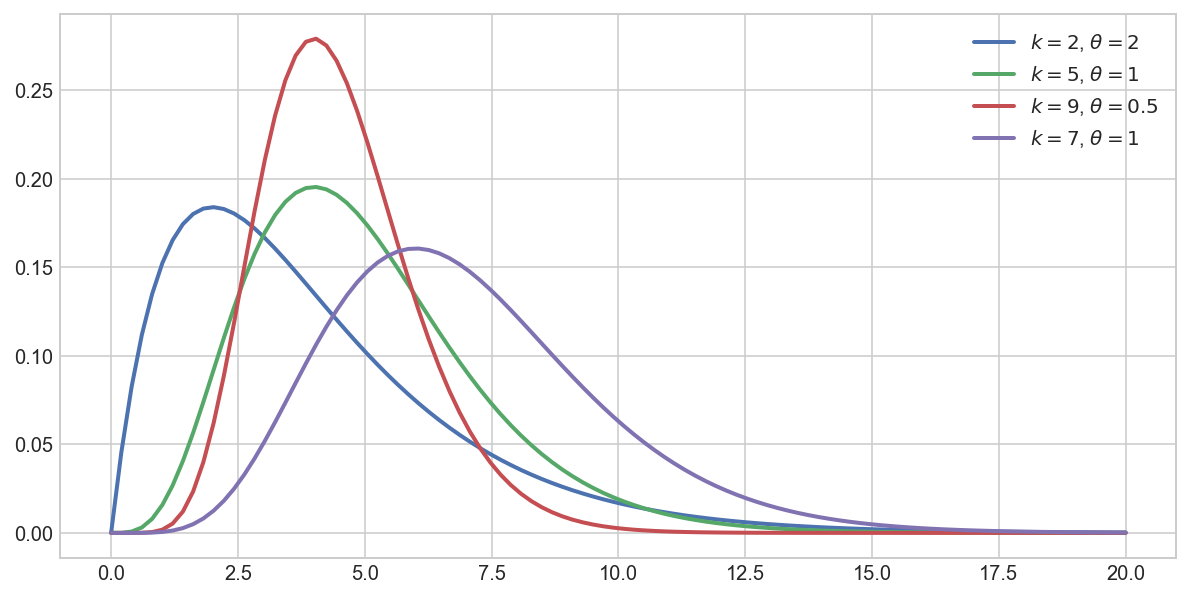

In [46]:
data = [(2,2), (5,1), (9,0.5), (7,1)]
fig, ax = plt.subplots(figsize=(10,5))
for k, theta in data:
    x = np.linspace(0, 20, 100)
    y = stats.gamma(a=k, scale=theta).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$k={k}$, $\theta={theta}$' for k, theta in data])
plt.show()

## 2.2. Multivariate distribution 

# 3. Limit theorems

With some condition, set of large number of random variables is followed some rule, limit theorems help us find out the rule to apply it in economic and business.


## 3.1. Bernoulli theorem

If $f$ is frequency of A in $n$ independent trials and $p$ is probability of A in each trial, then with all $\epsilon > 0$ we have:

$$\lim_{n -> \infty} P(|f-p| < \epsilon) =1$$

The formula says that the relative frequency of success in a sequence of Bernoulli trials approaches the probability of success as the number of trials increases towards infinity. It prove the stability of frequency around probability of an event. 

Bernoulli theorem is also called the law of large numbers of Bernoulli

## 3.2. Central limit theorem

In probability theory, the central limit theorem (CLT) establishes that, with large amout of randome variables, CLT that even if the data distribution is not normal, the distribution of the means of the samples drawn from it will be normal.

Below are the practical implications of knowing that means are normally distributed:
- Use the mean’s normal distribution to assign confidence intervals.
- Perform any statistical test under the sun which uses sample mean.

In [47]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [48]:
means = []
samples = []
for i in range(0, 1000):
    samples.append(np.random.exponential(scale=1.0, size=20))
    means.append(np.mean(samples[i]))

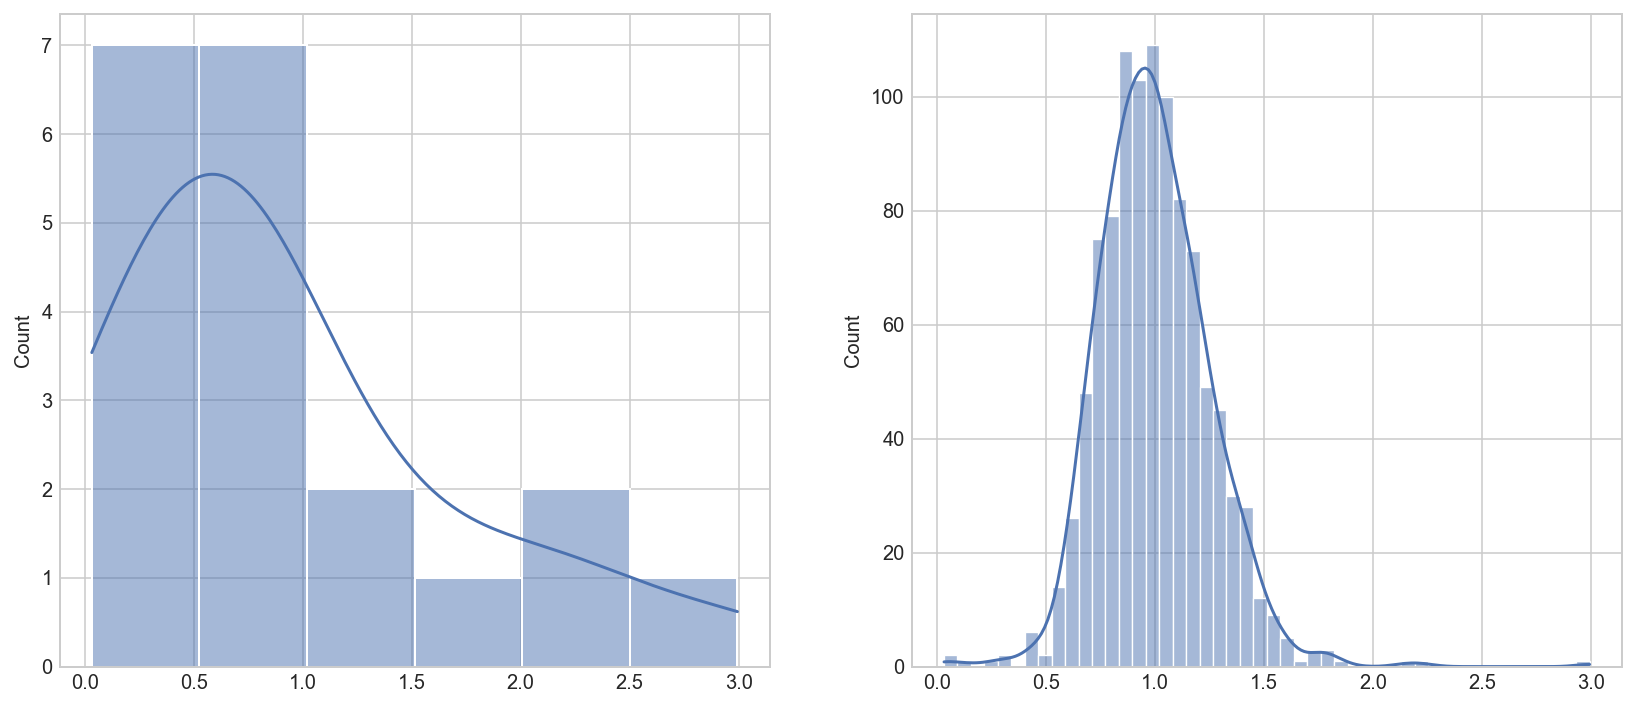

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.histplot(samples[0], ax=ax[0], kde=True, edgecolor='w')
sns.histplot(np.append(samples[0], means), ax=ax[1], kde=True, edgecolor='w')
plt.show()

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*